In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("C:/Dua Spring 2025/ML PRAC LABS/lab_vehicle (1).csv")
df.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [4]:
X= df.select_dtypes(include=[np.number])
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [5]:
kmeans= KMeans(n_clusters=3, random_state=32)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=32)

In [6]:
label = kmeans.labels_
centers= kmeans.cluster_centers_

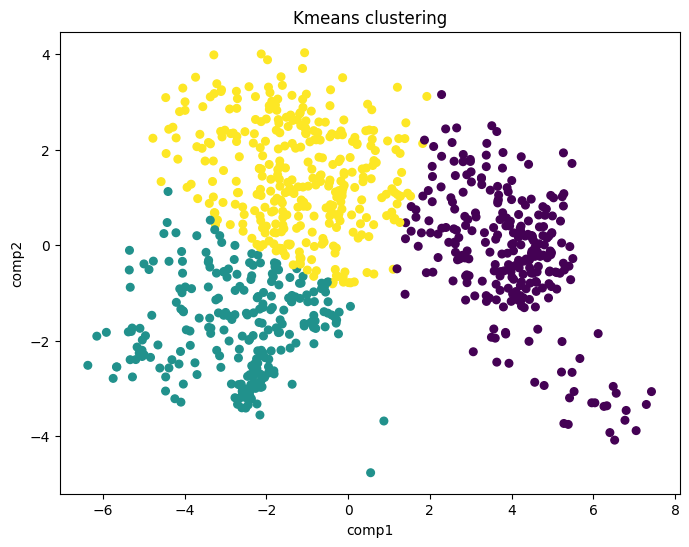

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis',c=label, s=30)
plt.title("Kmeans clustering")
plt.xlabel("comp1")
plt.ylabel("comp2")
plt.show()

ELBOW METHOD"   

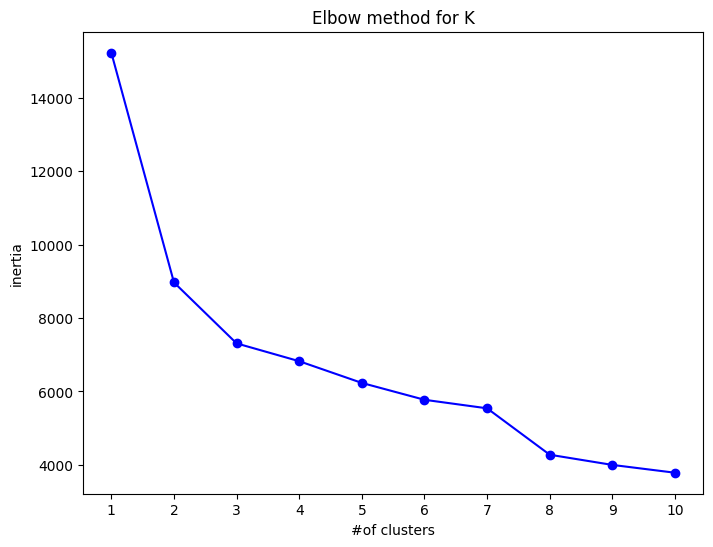

In [10]:
inertia=[]
K=range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=32)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(K,inertia, marker='o',color='blue', linestyle='-')
plt.title("Elbow method for K")
plt.xlabel("#of clusters")
plt.ylabel("inertia")
plt.xticks(K)
plt.show()

SILHOUETTE SCORE:

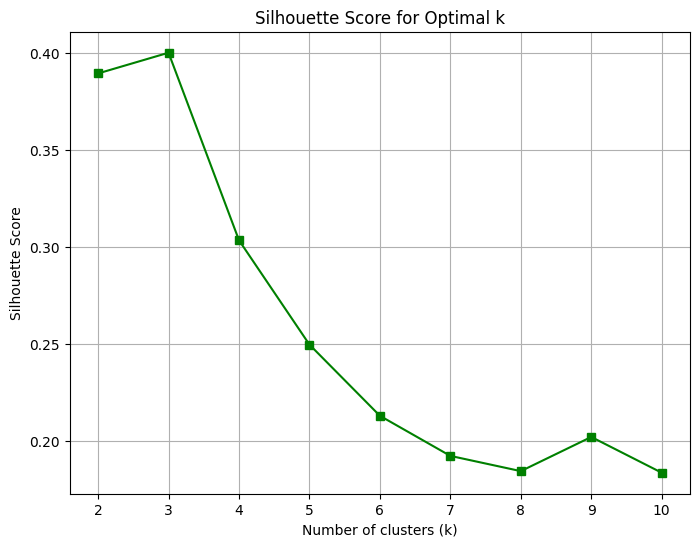

In [11]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()